# Solución del Modelo Neoclásico de Crecimiento usando el Shooting Algorithm

Mauricio M. Tejada

Departamento de Economía, Universidad Alberto Hurtado

---

## El Problema de Optimización 

El problema de optimización del planificador central es el siguiente:

\begin{eqnarray*}
\max U_{0} & = & \sum_{t=0}^{\infty}\beta^{t} g_L^t \left[\frac{(\hat{c}_{t}g_A^t)^{1-\sigma}-1}{1-\sigma}\right]\\
s.a &  & \hat{c}_{t}+\hat{i}_{t}=\hat{k}_{t}^{\alpha}\\
 &  & \hat{k}_{t+1}g_Ag_L=\hat{i}_{t}+(1-\delta)\hat{k}_{t}\\
 &  & \hat{k}_{0}\,dado.
\end{eqnarray*}

con $L_0=A_0=1$, $g_L=1+n$ y $g_A=1+x$. Alternativamente:

\begin{eqnarray*}
\max U_{0} & = & \sum_{t=0}^{\infty}\beta^{t}g_L^t\left[\frac{(\hat{c}_{t}g_A^t)^{1-\sigma}-1}{1-\sigma}\right]\\
s.a &  & \hat{c}_{t}+\hat{k}_{t+1}g_A g_L=\hat{k}_{t}^{\alpha}+(1-\delta)\hat{k}_{t}\\
 &  & k_{0}\,dado.
\end{eqnarray*}

De las CPO tenemos el siguiente sistema de ecuaciones en diferencias (no lineal):


\begin{eqnarray*}
\hat{c}_{t}^{-\sigma} & = & \beta g_A^{-\sigma}\hat{c}_{t+1}^{-\sigma}\left[\alpha \hat{k}_{t+1}^{\alpha-1}+1-\delta\right]\\
\hat{c}_{t}+\hat{k}_{t+1} g_Ag_L& = & \hat{k}_{t}^{\alpha}+1-\delta\hat{k}_{t}
\end{eqnarray*}

## Estado Estacionario 

El estado estacionario resuelve:
\begin{eqnarray*}
1 & = & \beta g_A^{-\sigma}\left[\alpha \hat{k}^{*\alpha-1}+1-\delta\right]\\
\hat{c}^{*} & = & \hat{k}^{*\alpha}+(1-\delta-g_A g_L) \hat{k}^{*}
\end{eqnarray*}

La solución puede ser hallada algebraicamente:

\begin{eqnarray*}
k^{*} & = & \left[\frac{1-\beta g_A^{-\sigma}(1-\delta)}{\beta g_A^{-\sigma}\alpha }\right]^{\frac{1}{\alpha-1}}\\
c^{*} & = & A\left[\frac{1-\beta g_A^{-\sigma}(1-\delta)}{\beta g_A^{-\sigma} \alpha }\right]^{\frac{\alpha}{\alpha-1}}+(1-\delta-g_A g_L)\left[\frac{1-\beta g_A^{-\sigma}(1-\delta)}{\beta g_A^{-\sigma}\alpha }\right]^{\frac{1}{\alpha-1}}
\end{eqnarray*}

## El Algorítmo de Solución

1. Dado $\hat{k}_0$, conjeturar $\hat{c}_0$
2. Calcular $\hat{k}_1,\hat{k}_2,...,\hat{k}_t$ y $\hat{c}_1,\hat{c}_2,...,\hat{c}_t$ usando las CPO y para un $t$ grande.
    - En este paso se requiere resolver el sistema (no lineal) para hallar $\hat{k}_{t+1}$ y $\hat{c}_{t+1}$ dados $\hat{k}_{t}$ y $\hat{c}_{t}$.
3. ¿$\hat{k}_t$ converge a $\hat{k}^*$? Si esto se cumple tenemos la solución, caso contrario es necesario actualizar $\hat{c}_0$:
    - Si $\hat{k}_t \rightarrow \infty$, existe sobre-ahorro y por tanto es necesario incrementar $\hat{c}_0$.
    - Si $\hat{k}_t \rightarrow 0$, existe sub-ahorro y por tanto es necesario incrementar $\hat{c}_0$.

## Solución del Modelo

In [2]:
# Paquetes necesarios
using NLsolve, Plots

### Estado Estacionario (Senda de Crecimiento Balanceado)

In [3]:
# Parámetros
α = 0.3
β = 0.98
σ = 1.5
δ = 0.2
gA = 1 + 0.02
gL = 1 + 0.01

params = (α, β, σ, δ, gA, gL);

In [9]:
# Hallamos el estado estacionario del modelo

function sistema_ee(x,p)
    α, β, σ, δ, gA, gL = p
        
    k = x[1]
    c = x[2]
    
    fee = zeros(2)
    
    fee[1] = 1 - β*(gA^(-σ))*(α*(k^(α-1))+1-δ)
    fee[2] = (k^α) + (1-δ-gA*gL)*k - c 
    
    return fee
end

sistema_ee (generic function with 2 methods)

In [10]:
solucion_ee = nlsolve(x -> sistema_ee(x,params), [1.5, 1.0], inplace = false)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.5, 1.0]
 * Zero: [1.2888784172449008, 0.7824048915854173]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [11]:
kstar = solucion_ee.zero[1]
cstar = solucion_ee.zero[2]

println("Solución Numérica")
println("k^*=$kstar") 
println("c^*=$cstar") 

Solución Numérica
k^*=1.2888784172449008
c^*=0.7824048915854173


In [12]:
# Verificamos la solución hallada con NLsolve:
kstar2 =  ((1-β*gA^(-σ)*(1-δ))/(β*gA^(-σ)*α))^(1/(α-1))
cstar2 = kstar2^α + (1-δ-gA*gL)*kstar2

println("Solución Algebraica")
println("k^*=$kstar2") 
println("c^*=$cstar2") 

Solución Algebraica
k^*=1.2888784172449266
c^*=0.7824048915854149


### Dinámica de Transición

In [13]:
# Estado Inicial
k0 = 0.5*kstar
println("k0=$k0") 

# Conjetura inicial para le consumo
cL = 0.000001*cstar
cH = (kstar^α) + (1-δ)*kstar

# Parámetros del método de solución
T = 100
tol = 1e-4
step = 0.1
niter = 200;
flag = 0;

k0=0.6444392086224504


Utilizamos el método de bisección para actualizar la conjetura del consumo inicial en el algoritmo de solución.

In [14]:
k = zeros(T)
c = zeros(T)

for i in 1:niter

    c0   = (cL+cH)/2
    c[1] = c0
    #println([cL, cH])
    k[1] = k0
    
    for t in 1:T-1
        
        k[t+1] = (k[t]^α + (1-δ)*k[t] - c[t])/(gA*gL)
        
        if k[t+1]<0
            flag = 1  # Consumo inicial muy alto
            break
        elseif k[t+1]>(kstar^α) + (1-δ)*kstar
            flag = 2  # Consumo inicial muy bajo
            break
        else
            c[t+1] = ((c[t]^σ)*β*(gA^(-σ))*(α*(k[t+1]^(α-1)) + 1 - δ))^(1/σ)
        end
        
        if t == T-1
            if abs(k[T]-kstar)/kstar < tol && abs(c[T]-cstar)/cstar < tol
                flag = 10
            elseif k[T]-kstar < -tol
                flag = 1 # Consumo inicial muy alto
            elseif k[T]-kstar > tol
                flag = 2 # Consumo inicial muy bajo
            end
        end
        
    end             
        
    if flag == 1
        cH = copy(c0) # Eliminamos la parte alta del intervalo
    elseif flag == 2
        cL = copy(c0) # Eliminamos la parte bajo del intervalo
    elseif flag == 10
        println("Solución encontrada!")
        println("El consumo inicial es: $c0")
        break
    end
        
end


Solución encontrada!
El consumo inicial es: 0.5992856861680562


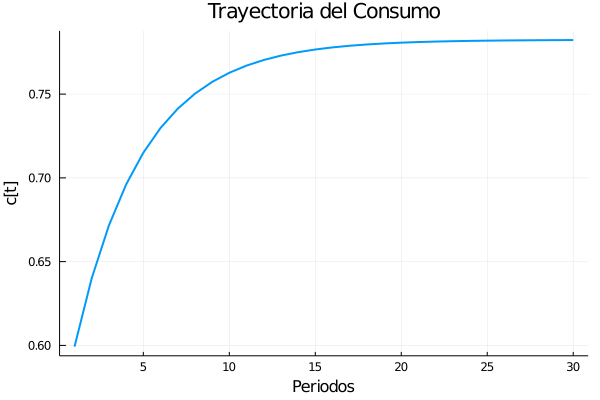

In [15]:
TG = 30
plot(c[1:TG], title = "Trayectoria del Consumo", legend = false,
     xlabel = "Periodos", ylabel = "c[t]", linewidth = 2)

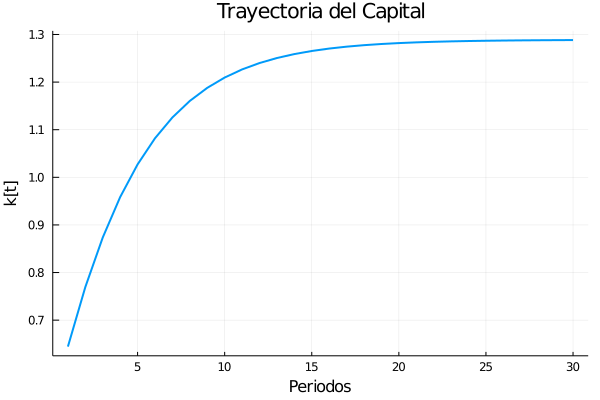

In [16]:
plot(k[1:TG], title = "Trayectoria del Capital", legend = false,
     xlabel = "Periodos", ylabel = "k[t]", linewidth = 2)

### Crecimiento del PIB Per Cápita

Analizamos el proceso de transición del crecimiento del PIB per cápita hacia su senda de crecimiento balanceado.

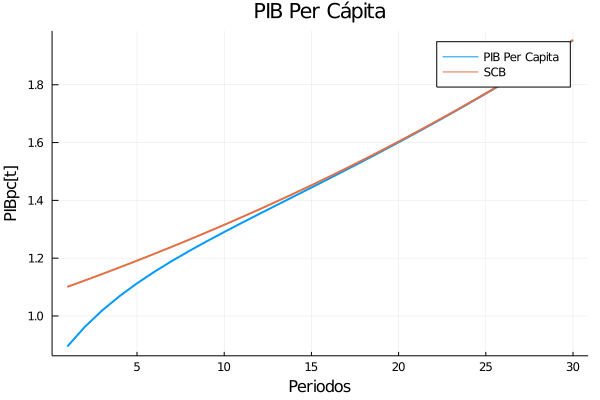

In [17]:
per = 1:length(k)
y = k.^α
ystar = kstar.^α
ypc = y.*gA.^per
ypc_star = ystar.*gA.^per

plot(per[1:TG],[ypc[1:TG] ypc_star[1:TG]], title = "PIB Per Cápita",
     xlabel = "Periodos", ylabel = "PIBpc[t]", label = ["PIB Per Capita" "SCB"],
     linewidth = 2)

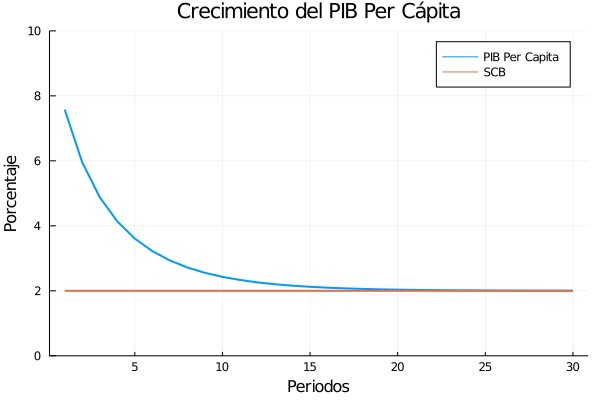

In [21]:
Δypc = ((ypc[2:end]./ypc[1:end-1]).-1)*100
Δypc_star = ((ypc_star[2:end]./ypc_star[1:end-1]).-1)*100

plot(per[1:TG],[Δypc[1:TG] Δypc_star[1:TG]], title = "Crecimiento del PIB Per Cápita",
     xlabel = "Periodos", ylabel = "Porcentaje", label = ["PIB Per Capita" "SCB"],
    linewidth = 2, ylim = (0,10))